C:\Users\Иван\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
C:\Users\Иван\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


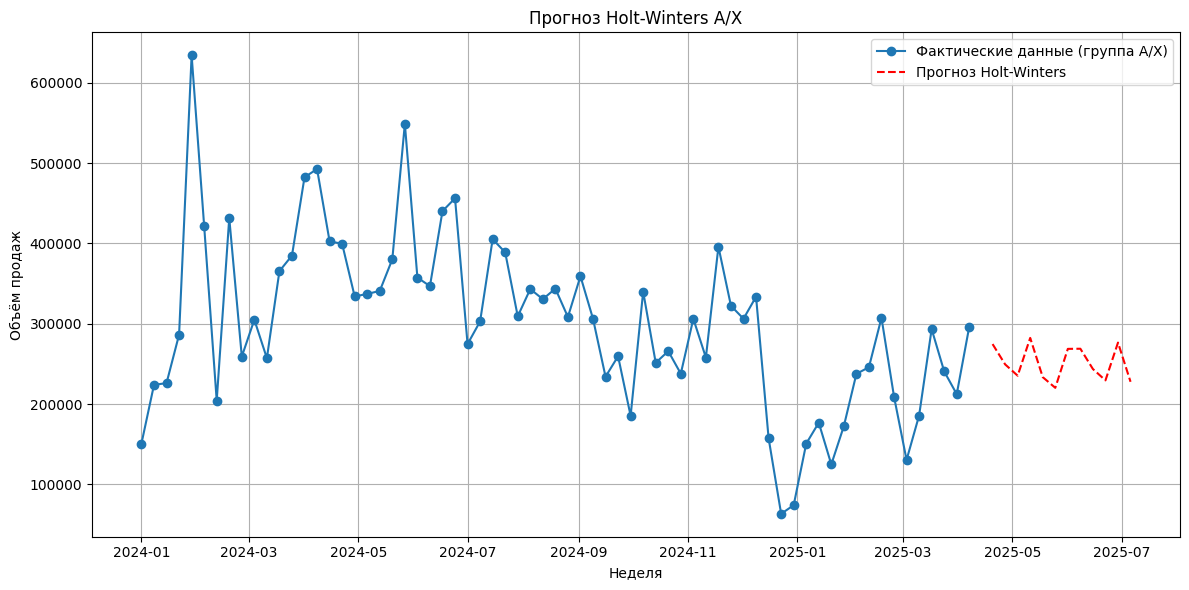

         Дата  Фактические данные (группа A/X)  Прогноз Holt-Winters
0  2024-01-01                        150757.44                   NaN
1  2024-01-08                        223832.71                   NaN
2  2024-01-15                        226051.66                   NaN
3  2024-01-22                        286308.39                   NaN
4  2024-01-29                        634156.93                   NaN
..        ...                              ...                   ...
74 2025-06-08                              NaN         268817.583557
75 2025-06-15                              NaN         243550.446368
76 2025-06-22                              NaN         229446.121803
77 2025-06-29                              NaN         276473.723414
78 2025-07-06                              NaN         227652.224531

[79 rows x 3 columns]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Загрузка данных 
file_path = "D:\Google dwnld\ABC_разбивка.xlsx"
abc_data = pd.read_excel(file_path)
abc_data['Неделя'] = pd.to_datetime(abc_data['Неделя'])

# Фильтрация группы A/X
data_a = abc_data[abc_data['ABC'] == 'A']

# Агрегация по неделям
weekly_a = data_a.groupby('Неделя')['ВП report'].sum().sort_index()

# Ограничение пиков в 2022 году до 600000
mask_2022 = (weekly_a.index.year == 2022) & (weekly_a > 800000)
weekly_a.loc[mask_2022] = 600000

# Удаление последних 6 недель факта
weekly_a = weekly_a.iloc[:-6]

# Обучение модели Holt-Winters с seasonal_periods=7
model_a = ExponentialSmoothing(
    weekly_a,
    trend="add",
    seasonal="add",
    seasonal_periods=7
).fit()

# Прогноз на 12 недель
forecast = model_a.forecast(12)
forecast_index = pd.date_range(weekly_a.index[-1], periods=13, freq='W')[1:]

# Обрезаем данные для графика с 2024 года
weekly_a_2024 = weekly_a[weekly_a.index.year >= 2024]

# Визуализация графика
plt.figure(figsize=(12, 6))
plt.plot(weekly_a_2024.index, weekly_a_2024.values, label="Фактические данные (группа A/X)", marker="o")
plt.plot(forecast_index, forecast.values, label="Прогноз Holt-Winters", linestyle="--", color="red")
plt.title("Прогноз Holt-Winters A/X")
plt.xlabel("Неделя")
plt.ylabel("Объём продаж")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Формируем таблицу "Факт + Прогноз"
result_df = pd.DataFrame({
    'Дата': list(weekly_a_2024.index) + list(forecast_index),
    'Фактические данные (группа A/X)': list(weekly_a_2024.values) + [None]*len(forecast),
    'Прогноз Holt-Winters': [None]*len(weekly_a_2024) + list(forecast.values)
})

# Сохраняем в Excel (по желанию)
result_df.to_excel("Прогноз_HoltWinters_AX.xlsx", index=False)

# Вывод таблицы в консоль (если нужно)
print(result_df)


C:\Users\Иван\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
C:\Users\Иван\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
C:\Users\Иван\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\

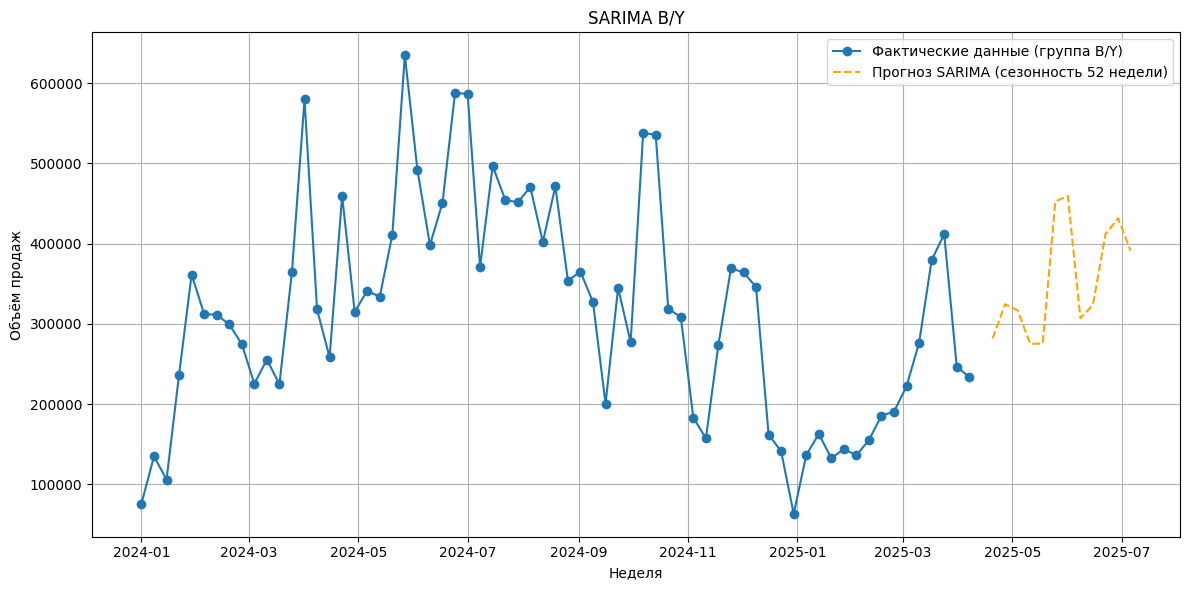

         Дата  Фактические данные (группа B/Y)  \
0  2024-01-01                        75853.478   
1  2024-01-08                       134869.606   
2  2024-01-15                       105929.444   
3  2024-01-22                       236797.791   
4  2024-01-29                       361509.605   
..        ...                              ...   
74 2025-06-08                              NaN   
75 2025-06-15                              NaN   
76 2025-06-22                              NaN   
77 2025-06-29                              NaN   
78 2025-07-06                              NaN   

    Прогноз SARIMA (сезонность 52 недель)  
0                                     NaN  
1                                     NaN  
2                                     NaN  
3                                     NaN  
4                                     NaN  
..                                    ...  
74                          306976.837419  
75                          323489.722035  
76 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Загрузка данных
file_path = "D:\Google dwnld\ABC_разбивка.xlsx"
abc_data = pd.read_excel(file_path)
abc_data['Неделя'] = pd.to_datetime(abc_data['Неделя'])

# Фильтрация группы B/Y
data_b = abc_data[abc_data['ABC'] == 'B']

# Агрегация по неделям
weekly_b = data_b.groupby('Неделя')['ВП report'].sum().sort_index()

# Ограничение пиков в 2022 году до 600000
mask_2022_b = (weekly_b.index.year == 2022) & (weekly_b > 800000)
weekly_b.loc[mask_2022_b] = 600000

# Удаление последних 6 недель факта
weekly_b = weekly_b.iloc[:-6]

# Построение модели SARIMA 
model_b_sarima_seasonal = SARIMAX(weekly_b, order=(3, 0, 5), seasonal_order=(1, 1, 1, 52)).fit()

# Прогноз на 13 недель
forecast_b_sarima_seasonal = model_b_sarima_seasonal.forecast(12)
forecast_index_b = pd.date_range(weekly_b.index[-1], periods=13, freq='W')[1:]

# Отображение данных с 2024 года
weekly_b_2024 = weekly_b[weekly_b.index.year >= 2024]

# Визуализация
plt.figure(figsize=(12, 6))
plt.plot(weekly_b_2024.index, weekly_b_2024.values, label="Фактические данные (группа B/Y)", marker="o")
plt.plot(forecast_index_b, forecast_b_sarima_seasonal.values, label="Прогноз SARIMA (сезонность 52 недели)", linestyle="--", color="orange")
plt.title("SARIMA B/Y")
plt.xlabel("Неделя")
plt.ylabel("Объём продаж")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Таблица факт + прогноз
result_df_b = pd.DataFrame({
    'Дата': list(weekly_b_2024.index) + list(forecast_index_b),
    'Фактические данные (группа B/Y)': list(weekly_b_2024.values) + [None]*len(forecast_b_sarima_seasonal),
    'Прогноз SARIMA (сезонность 52 недель)': [None]*len(weekly_b_2024) + list(forecast_b_sarima_seasonal.values)
})

# Сохранение таблицы в Excel (по желанию)
result_df_b.to_excel("SARIMA_B_Y_Прогноз.xlsx", index=False)

# Печать результата в консоль (опционально)
print(result_df_b)


C:\Users\Иван\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\Иван\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\Иван\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\Иван\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loca

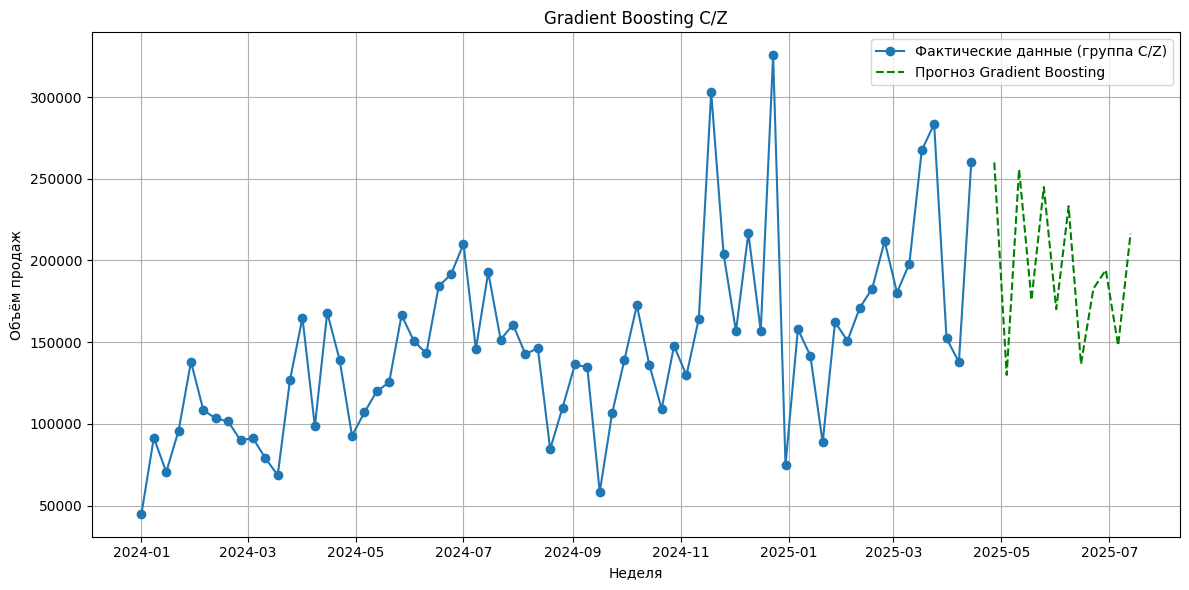

         Дата  Фактические данные (группа C/Z)  Прогноз Gradient Boosting
0  2024-01-01                        44965.179                        NaN
1  2024-01-08                        91580.812                        NaN
2  2024-01-15                        70509.633                        NaN
3  2024-01-22                        95920.437                        NaN
4  2024-01-29                       137981.952                        NaN
..        ...                              ...                        ...
75 2025-06-15                              NaN              136603.329614
76 2025-06-22                              NaN              182742.528002
77 2025-06-29                              NaN              194132.164141
78 2025-07-06                              NaN              147932.313968
79 2025-07-13                              NaN              216474.806432

[80 rows x 3 columns]


In [2]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor

# Загрузка данных
abc_data = pd.read_excel("D:\Google dwnld\ABC_разбивка.xlsx")
abc_data['Неделя'] = pd.to_datetime(abc_data['Неделя'])

# Фильтрация группы C/Z
data_c = abc_data[abc_data['ABC'] == 'C']

# Агрегация по неделям
weekly_c = data_c.groupby('Неделя')['ВП report'].sum().sort_index()

# Ограничение пиков в 2022 году до 600000
weekly_c.loc[(weekly_c.index.year == 2022) & (weekly_c > 800000)] = 600000

# Удаление последних 6 недель
weekly_c = weekly_c.iloc[:-6]

# Подготовка данных (создание лаговых признаков)
df_c = pd.DataFrame({'y': weekly_c})
for lag in range(1, 7):
    df_c[f'lag_{lag}'] = df_c['y'].shift(lag)
df_c.dropna(inplace=True)

# Разделение на признаки и целевую переменную
X = df_c.drop('y', axis=1)
y = df_c['y']

# Обучение модели градиентного бустинга
model_c = GradientBoostingRegressor(
    n_estimators=500,
    max_depth=3,
    learning_rate=0.1,
    random_state=11
)
model_c.fit(X, y)

# Прогноз на 12 недель вперед
last_known = df_c.iloc[-1, 1:].values.reshape(1, -1)
forecast_c = []
for _ in range(12):
    y_pred = model_c.predict(last_known)[0]
    forecast_c.append(y_pred)
    last_known = np.roll(last_known, -1)
    last_known[0, -1] = y_pred

forecast_index_c = pd.date_range(weekly_c.index[-1], periods=13, freq='W')[1:]

# Отображение данных с 2024 года
weekly_c_2024 = weekly_c[weekly_c.index.year >= 2024]

# Построение графика прогноза
plt.figure(figsize=(12, 6))
plt.plot(weekly_c_2024.index, weekly_c_2024.values, label="Фактические данные (группа C/Z)", marker="o")
plt.plot(forecast_index_c, forecast_c, label="Прогноз Gradient Boosting", linestyle="--", color="green")
plt.title("Gradient Boosting C/Z")
plt.xlabel("Неделя")
plt.ylabel("Объём продаж")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Сохранение таблицы факта и прогноза в Excel
result_df_c = pd.DataFrame({
    'Дата': list(weekly_c_2024.index) + list(forecast_index_c),
    'Фактические данные (группа C/Z)': list(weekly_c_2024.values) + [None]*len(forecast_c),
    'Прогноз Gradient Boosting': [None]*len(weekly_c_2024) + forecast_c
})

result_df_c.to_excel("Gradient_Boosting_CZ_Прогноз.xlsx", index=False)
print(result_df_c)